In [1]:
#https://www.kaggle.com/allunia/protein-atlas-exploration-and-baseline
#https://www.kaggle.com/allunia/in-depth-protein-correlations

In [45]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
os.sys.path.append('../fastai/') #fastai version 1

from pathlib import Path
import numpy as np

import seaborn as sns
sns.set()


DP = Path('/home/Deep_Learner/work/datasets/human-protein-atlas-image-classification/')
STAGE_ONE_DATA = DP/'stage1_data'
TRAIN_PNGS = 'train_pngs_512'
TEST_PNGS = 'test_pngs_512'
TRAIN_CSV = 'train.csv'

label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_label_names = dict((v,k) for k,v in label_names.items())

In [46]:
train_labels = pd.read_csv(STAGE_ONE_DATA/TRAIN_CSV)

In [60]:
def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

def get_labels_distribution(df:pd.DataFrame):
    for key in label_names.keys():
        df[label_names[key]] = 0
    df = df.apply(fill_targets, axis=1)
    target_counts = df.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
    plt.figure(figsize=(15,15))
    sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)
    return target_counts

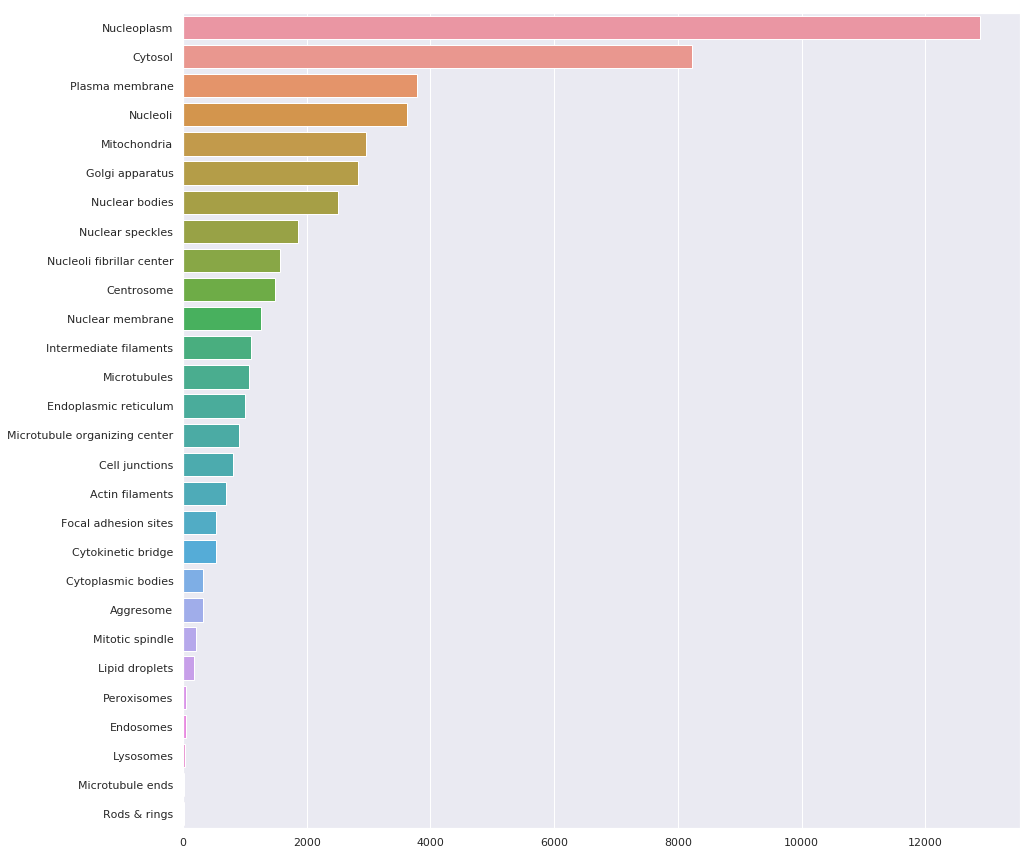

In [61]:
target_counts = get_labels_distribution(train_labels)

In [65]:
target_counts

Nucleoplasm                      12885
Cytosol                           8228
Plasma membrane                   3777
Nucleoli                          3621
Mitochondria                      2965
Golgi apparatus                   2822
Nuclear bodies                    2513
Nuclear speckles                  1858
Nucleoli fibrillar center         1561
Centrosome                        1482
Nuclear membrane                  1254
Intermediate filaments            1093
Microtubules                      1066
Endoplasmic reticulum             1008
Microtubule organizing center      902
Cell junctions                     802
Actin filaments                    688
Focal adhesion sites               537
Cytokinetic bridge                 530
Cytoplasmic bodies                 328
Aggresome                          322
Mitotic spindle                    210
Lipid droplets                     172
Peroxisomes                         53
Endosomes                           45
Lysosomes                

In [119]:
rare_classes = {'Peroxisomes', 'Endosomes', 'Lysosomes', 'Microtubule ends', 'Rods & rings'}

In [120]:
lbs_balanced = pd.read_csv(STAGE_ONE_DATA/TRAIN_CSV)

In [121]:
lbs_balanced.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [116]:
for index, row in lbs_balanced.iterrows():
    s = str(row['Target'])
    sl = s.split(sep=' ')
    il = [int(st) for st in sl]
    ls = [label_names[l] for l in il]
    if bool(set(ls) & rare_classes):
        for i in range(200):
            lbs_balanced = lbs_balanced.append(row)

KeyboardInterrupt: 

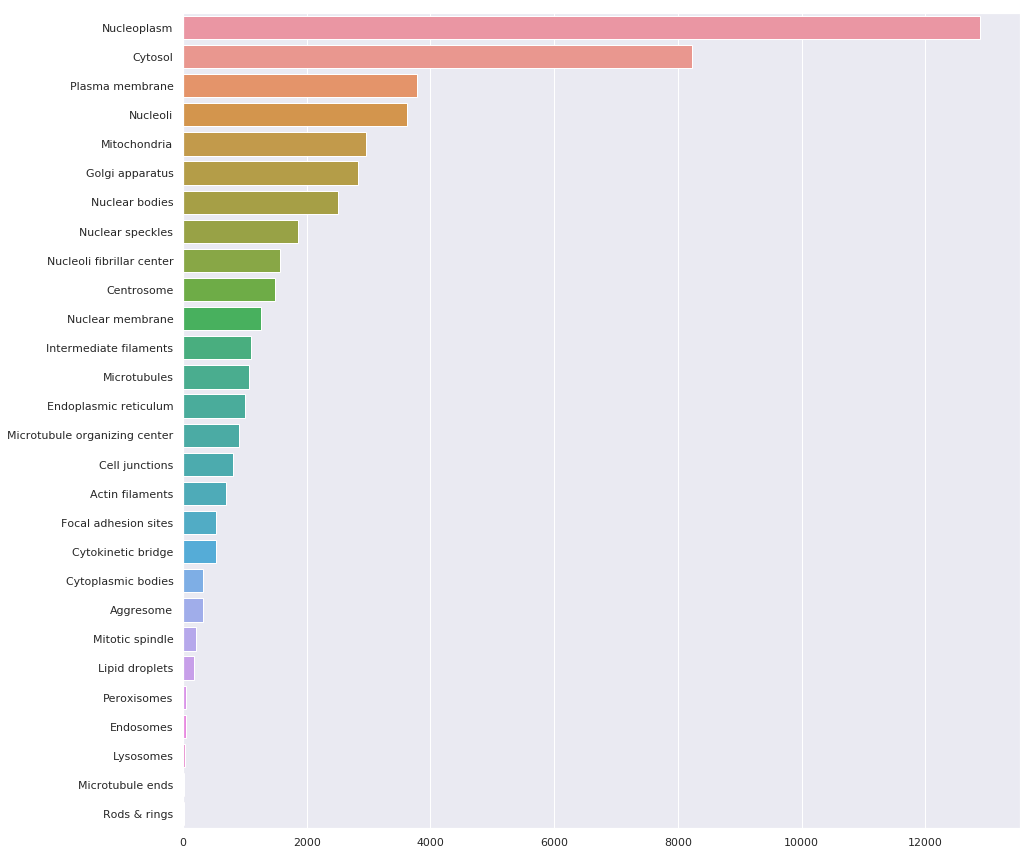

In [122]:
t = get_labels_distribution(lbs_balanced)

In [123]:
t

Nucleoplasm                      12885
Cytosol                           8228
Plasma membrane                   3777
Nucleoli                          3621
Mitochondria                      2965
Golgi apparatus                   2822
Nuclear bodies                    2513
Nuclear speckles                  1858
Nucleoli fibrillar center         1561
Centrosome                        1482
Nuclear membrane                  1254
Intermediate filaments            1093
Microtubules                      1066
Endoplasmic reticulum             1008
Microtubule organizing center      902
Cell junctions                     802
Actin filaments                    688
Focal adhesion sites               537
Cytokinetic bridge                 530
Cytoplasmic bodies                 328
Aggresome                          322
Mitotic spindle                    210
Lipid droplets                     172
Peroxisomes                         53
Endosomes                           45
Lysosomes                